

## **Project: Predicting Injury Risk in Football Players**

### **1. Problem Statement**

Football clubs want to **prevent injuries** by predicting which players are at higher risk based on training loads, match schedules, and physiological data.
We aim to **predict whether a player is at risk of injury** in the next match or training session.

---

### **2. Why Boosting Algorithms?**

* **XGBoost / Gradient Boosting / AdaBoost** can handle:

  * Tabular data (player stats, training loads, biometrics)
  * Missing data (e.g., incomplete logs)
  * Complex nonlinear relationships (fatigue + match frequency → injury risk)
* High **accuracy and interpretability** (feature importance shows what factors contribute most to injury).

---

### **3. Dataset Ideas**

* **Open-source datasets:**

  * [FIFA Player Attributes](https://www.kaggle.com/datasets/stefanoleone992/fifa-21-complete-player-dataset) → player skills and fitness stats
  * [Player Match Logs](https://www.kaggle.com/datasets/karangadiya/fifa19) → minutes played, matches, goals, substitutions
  * [Football Injuries Dataset](https://www.kaggle.com/datasets/nikdavis/football-injuries-dataset) → actual injury events
* **Synthetic features you can create:**

  * **Weekly match load** = sum of minutes played in past 7 days
  * **Training intensity index** = training hours × intensity factor
  * **Fatigue index** = weighted sum of matches played + minutes trained

---

### **4. Features to Use**

| Feature               | Description                               |
| --------------------- | ----------------------------------------- |
| Age                   | Player age                                |
| Position              | Defender, Midfielder, Forward, Goalkeeper |
| Minutes played        | In last match/week/month                  |
| Match frequency       | Matches per week                          |
| Training load         | Hours × intensity                         |
| Previous injuries     | Count or binary                           |
| Recovery time         | Days since last match/training            |
| Sleep or wellness     | Optional, if available                    |
| Player fitness rating | From FIFA dataset or club data            |

---

### **5. Target Variable**

* **Binary classification:** `Injury Risk`

  * 1 = Player is at risk of injury in next match/training
  * 0 = Player is safe

Optional: **Multi-class** for severity: minor, moderate, severe injury.

---

### **6. Modeling Steps**

1. **Data Cleaning & Preprocessing**

   * Handle missing values (imputation or mean replacement)
   * Encode categorical variables (position → one-hot encoding)
   * Normalize numeric features if needed
2. **Feature Engineering**

   * Create rolling averages for load, fatigue, minutes played
   * Interaction features (e.g., age × match load)
3. **Train-Test Split**

   * Split dataset (70%-30% or 80%-20%)
4. **Model Selection**

   * XGBoost / Gradient Boosting / AdaBoost classifier
5. **Hyperparameter Tuning**

   * GridSearchCV or RandomizedSearchCV for `n_estimators`, `max_depth`, `learning_rate`
6. **Evaluation**

   * Metrics: Accuracy, F1-score, ROC-AUC
   * Confusion matrix for class imbalance
7. **Feature Importance**

   * Identify **top injury predictors** (e.g., fatigue index, previous injuries)

---

### **7. Optional Advanced Ideas**

* Handle **class imbalance** (injuries are rarer than safe matches) using **SMOTE** or **class weighting**.
* Use **time-series modeling** for match load trends.
* Visualize **injury risk heatmap per player per week** for clubs.
* Deploy as a **web app** where coaches input player stats → get injury risk prediction.

---

### **8. Why This Project is Unique**

* Many injury prediction studies use **deep learning or wearables**; using **boosting on tabular player stats** is simpler, faster, and still accurate.
* Can produce **feature importance explanations** for coaches.
* Easily **scalable** to multiple leagues, teams, or sports.




In [9]:
# Step 1: Import necessary library
import pandas as pd

# Step 2: Load the CSV file
data = pd.read_csv("dataset.csv")  # Replace with your CSV path if different

# Step 3: Check basic info
print("Dataset shape:", data.shape)
print("\nFirst 5 rows:")
print(data.head())

# Step 4: Check for missing values
print("\nMissing values per column:")
print(data.isnull().sum())


Dataset shape: (1301, 30)

First 5 rows:
            p_id2  start_year  season_days_injured  total_days_injured  \
0   aaronconnolly        2019                   13                 161   
1   aaronconnolly        2020                   71                 161   
2  aaroncresswell        2016                   95                 226   
3  aaroncresswell        2018                   87                 226   
4  aaroncresswell        2019                   35                 226   

   season_minutes_played  season_games_played  season_matches_in_squad  \
0                 1312.0                   24                       28   
1                  836.0                   17                       28   
2                 2247.0                   26                       27   
3                 1680.0                   20                       27   
4                 2870.0                   31                       31   

   total_minutes_played  total_games_played         dob  ...  \
0    

In [10]:
data.head()

,p_id2,start_year,season_days_injured,total_days_injured,season_minutes_played,season_games_played,season_matches_in_squad,total_minutes_played,total_games_played,dob,...,cumulative_games_played,minutes_per_game_prev_seasons,avg_days_injured_prev_seasons,avg_games_per_season_prev_seasons,bmi,work_rate_numeric,position_numeric,significant_injury_prev_season,cumulative_days_injured,season_days_injured_prev_season
0,aaronconnolly,2019,13,161,1312.0,24,28,2148.0,41,2000-01-28,...,NaN,NaN,NaN,NaN,24.613627,2.5,2.0,NaN,NaN,NaN
1,aaronconnolly,2020,71,161,836.0,17,28,2148.0,41,2000-01-28,...,24.0,54.666667,13.0,24.0,24.613627,2.5,2.0,0.0,161.0,13.0
2,aaroncresswell,2016,95,226,2247.0,26,27,13368.0,149,1989-12-15,...,NaN,NaN,NaN,NaN,22.396079,3.5,1.0,NaN,NaN,NaN
3,aaroncresswell,2018,87,226,1680.0,20,27,13368.0,149,1989-12-15,...,26.0,86.423077,95.0,26.0,22.396079,3.5,1.0,0.0,226.0,95.0
4,aaroncresswell,2019,35,226,2870.0,31,31,13368.0,149,1989-12-15,...,46.0,85.369565,91.0,23.0,22.396079,3.5,1.0,0.0,452.0,87.0


In [11]:
data.tail()

,p_id2,start_year,season_days_injured,total_days_injured,season_minutes_played,season_games_played,season_matches_in_squad,total_minutes_played,total_games_played,dob,...,cumulative_games_played,minutes_per_game_prev_seasons,avg_days_injured_prev_seasons,avg_games_per_season_prev_seasons,bmi,work_rate_numeric,position_numeric,significant_injury_prev_season,cumulative_days_injured,season_days_injured_prev_season
1296,yoshinorimuto,2019,46,210,288.0,8,17,915.0,25,1992-07-15,...,17.0,36.882353,40.0,17.0,22.597274,4.0,2.0,0.0,210.0,40.0
1297,yvesbissouma,2018,124,124,1880.0,28,34,6477.0,86,1996-08-30,...,NaN,NaN,NaN,NaN,24.151673,3.5,3.0,NaN,NaN,NaN
1298,zacksteffen,2020,30,307,95.0,1,35,95.0,1,1995-04-02,...,NaN,NaN,NaN,NaN,23.244977,3.0,0.0,NaN,NaN,NaN
1299,zlatanibrahimovic,2016,210,579,2577.0,28,28,2699.0,33,1981-10-03,...,NaN,NaN,NaN,NaN,24.983563,2.5,2.0,NaN,NaN,NaN
1300,zlatanibrahimovic,2017,84,579,122.0,5,8,2699.0,33,1981-10-03,...,28.0,92.035714,210.0,28.0,24.983563,2.5,2.0,1.0,579.0,210.0


In [12]:
data.columns

Index(['p_id2', 'start_year', 'season_days_injured', 'total_days_injured',
       'season_minutes_played', 'season_games_played',
       'season_matches_in_squad', 'total_minutes_played', 'total_games_played',
       'dob', 'height_cm', 'weight_kg', 'nationality', 'work_rate', 'pace',
       'physic', 'fifa_rating', 'position', 'age', 'cumulative_minutes_played',
       'cumulative_games_played', 'minutes_per_game_prev_seasons',
       'avg_days_injured_prev_seasons', 'avg_games_per_season_prev_seasons',
       'bmi', 'work_rate_numeric', 'position_numeric',
       'significant_injury_prev_season', 'cumulative_days_injured',
       'season_days_injured_prev_season'],
      dtype='object')

In [13]:
data.dtypes

p_id2                                 object
start_year                             int64
season_days_injured                    int64
total_days_injured                     int64
season_minutes_played                float64
season_games_played                    int64
season_matches_in_squad                int64
total_minutes_played                 float64
total_games_played                     int64
dob                                   object
height_cm                            float64
weight_kg                            float64
nationality                           object
work_rate                             object
pace                                 float64
physic                               float64
fifa_rating                          float64
position                              object
age                                    int64
cumulative_minutes_played            float64
cumulative_games_played              float64
minutes_per_game_prev_seasons        float64
avg_days_i

In [14]:
# Count missing values
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print(missing_values)


minutes_per_game_prev_seasons        616
cumulative_minutes_played            604
cumulative_games_played              604
avg_days_injured_prev_seasons        604
significant_injury_prev_season       604
cumulative_days_injured              604
season_days_injured_prev_season      604
avg_games_per_season_prev_seasons    604
pace                                  95
physic                                95
position                               2
position_numeric                       2
dtype: int64


In [15]:
# Summary statistics of numeric columns
data.describe()


,start_year,season_days_injured,total_days_injured,season_minutes_played,season_games_played,season_matches_in_squad,total_minutes_played,total_games_played,height_cm,weight_kg,...,cumulative_games_played,minutes_per_game_prev_seasons,avg_days_injured_prev_seasons,avg_games_per_season_prev_seasons,bmi,work_rate_numeric,position_numeric,significant_injury_prev_season,cumulative_days_injured,season_days_injured_prev_season
count,1301.000000,1301.000000,1301.000000,1301.000000,1301.000000,1301.000000,1301.000000,1301.000000,1301.000000,1301.000000,...,697.000000,685.000000,697.000000,697.000000,1301.000000,1301.000000,1299.000000,697.000000,697.000000,697.000000
mean,2018.099923,79.050730,260.710992,1483.156034,19.509608,25.089931,5533.593390,71.638739,182.516205,76.833935,...,53.279770,74.541947,79.501987,21.952038,23.039310,3.346272,1.823711,0.225251,786.351506,81.279770
std,1.384810,84.578169,202.741896,1014.013920,11.099727,10.157698,4095.421082,46.854260,6.821092,7.362975,...,63.111519,17.856054,71.057640,9.408793,1.470255,0.392971,0.999472,0.418048,1064.323175,84.353614
min,2016.000000,0.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,163.000000,58.000000,...,0.000000,7.000000,2.000000,0.000000,18.792451,2.500000,0.000000,0.000000,7.000000,0.000000
25%,2017.000000,24.000000,111.000000,612.000000,10.000000,19.000000,2012.000000,31.000000,178.000000,72.000000,...,23.000000,65.500000,29.000000,16.000000,22.093170,3.000000,1.000000,0.000000,191.000000,26.000000
50%,2018.000000,49.000000,210.000000,1440.000000,21.000000,28.000000,5023.000000,69.000000,183.000000,76.000000,...,35.000000,80.080645,60.500000,23.000000,23.074830,3.500000,2.000000,0.000000,427.000000,50.000000
75%,2019.000000,103.000000,370.000000,2311.000000,29.000000,33.000000,8387.000000,107.000000,187.666667,82.000000,...,64.000000,87.925926,111.500000,29.000000,23.947116,3.500000,3.000000,0.000000,903.000000,109.000000
max,2020.000000,702.000000,2398.000000,3610.000000,38.000000,54.000000,16768.000000,179.000000,203.000000,99.000000,...,508.000000,95.000000,702.000000,38.000000,28.525475,4.000000,3.000000,1.000000,7590.000000,702.000000


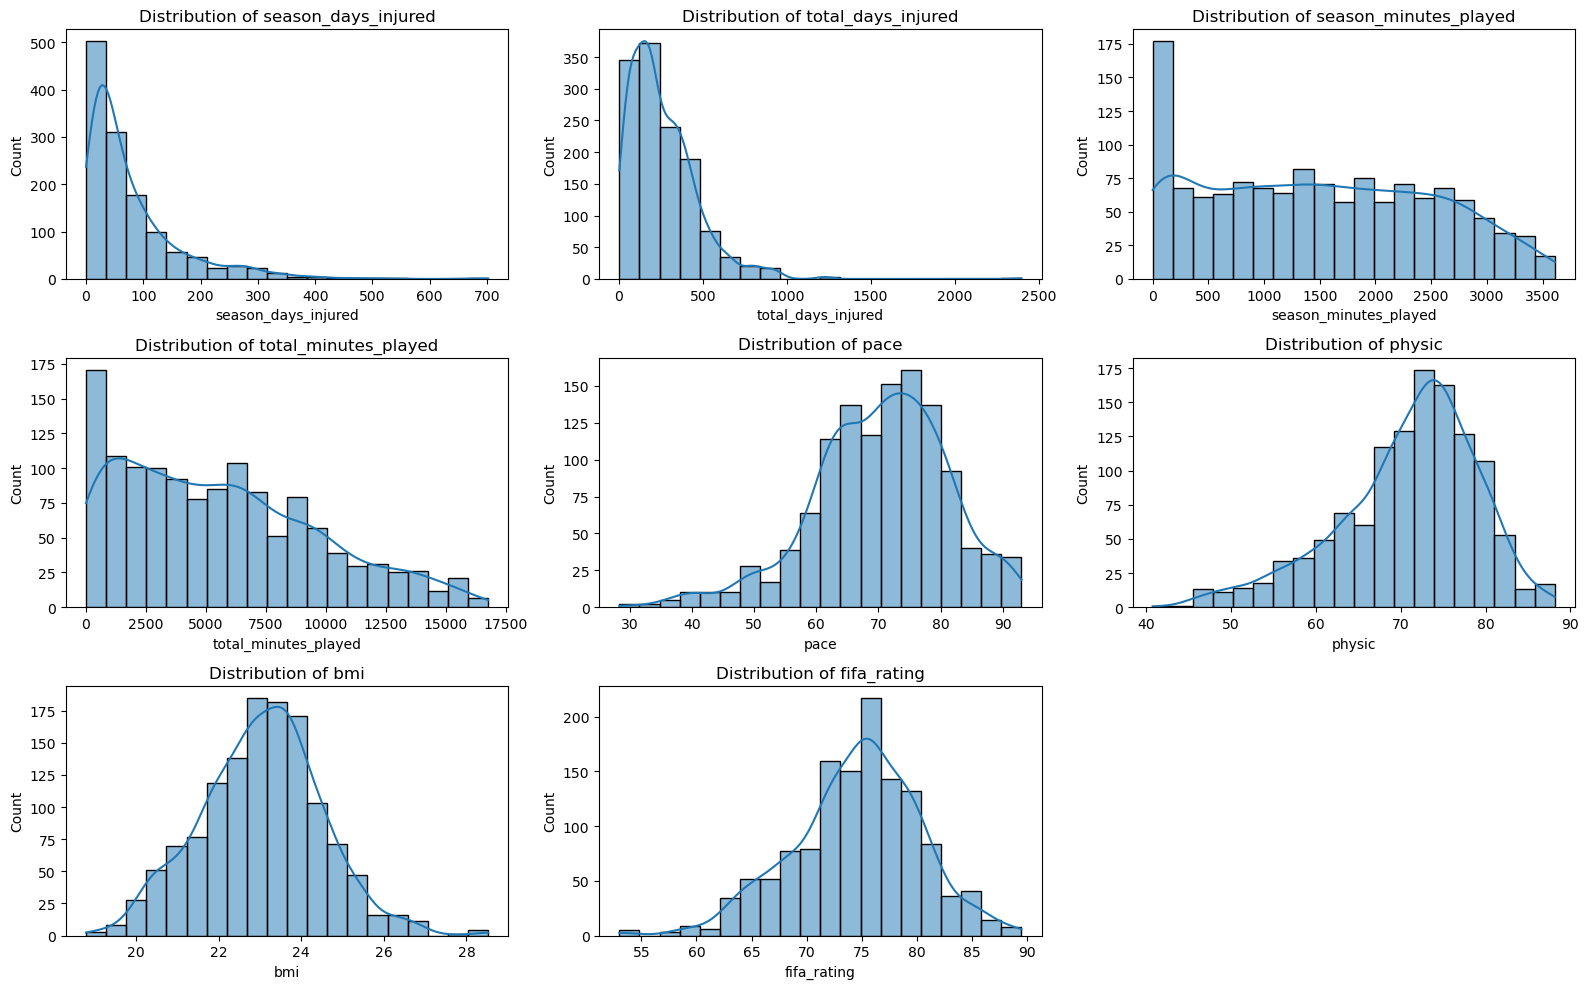

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numeric columns
num_cols = ['season_days_injured', 'total_days_injured', 'season_minutes_played', 
            'total_minutes_played', 'pace', 'physic', 'bmi', 'fifa_rating']

plt.figure(figsize=(16,10))
for i, col in enumerate(num_cols):
    plt.subplot(3,3,i+1)
    sns.histplot(data[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


In [17]:
# Check unique values
categorical_cols = ['position', 'work_rate', 'nationality']
for col in categorical_cols:
    print(f"\n{col} unique values:")
    print(data[col].value_counts())



position unique values:
position
Defender      492
Midfielder    457
Forward       253
Goalkeeper     97
Name: count, dtype: int64

work_rate unique values:
work_rate
Medium/Medium    434
High/Medium      337
Medium/High      209
High/High        206
Low/High          29
Low/Medium        29
High/Low          29
Medium/Low        28
Name: count, dtype: int64

nationality unique values:
nationality
England                551
France                  87
Republic of Ireland     55
Scotland                52
Netherlands             51
                      ... 
Ecuador                  1
Bermuda                  1
Estonia                  1
Canada                   1
Finland                  1
Name: count, Length: 61, dtype: int64


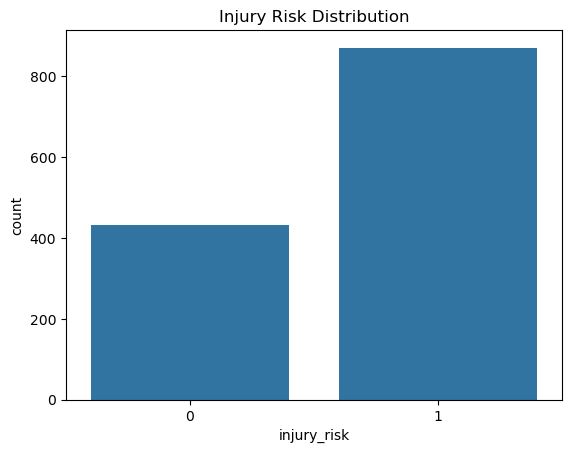

In [19]:
# Create target column first
data['injury_risk'] = data['season_days_injured'].apply(lambda x: 1 if x > 30 else 0)

# Count of high-risk vs low-risk players
sns.countplot(x='injury_risk', data=data)
plt.title("Injury Risk Distribution")
plt.show()


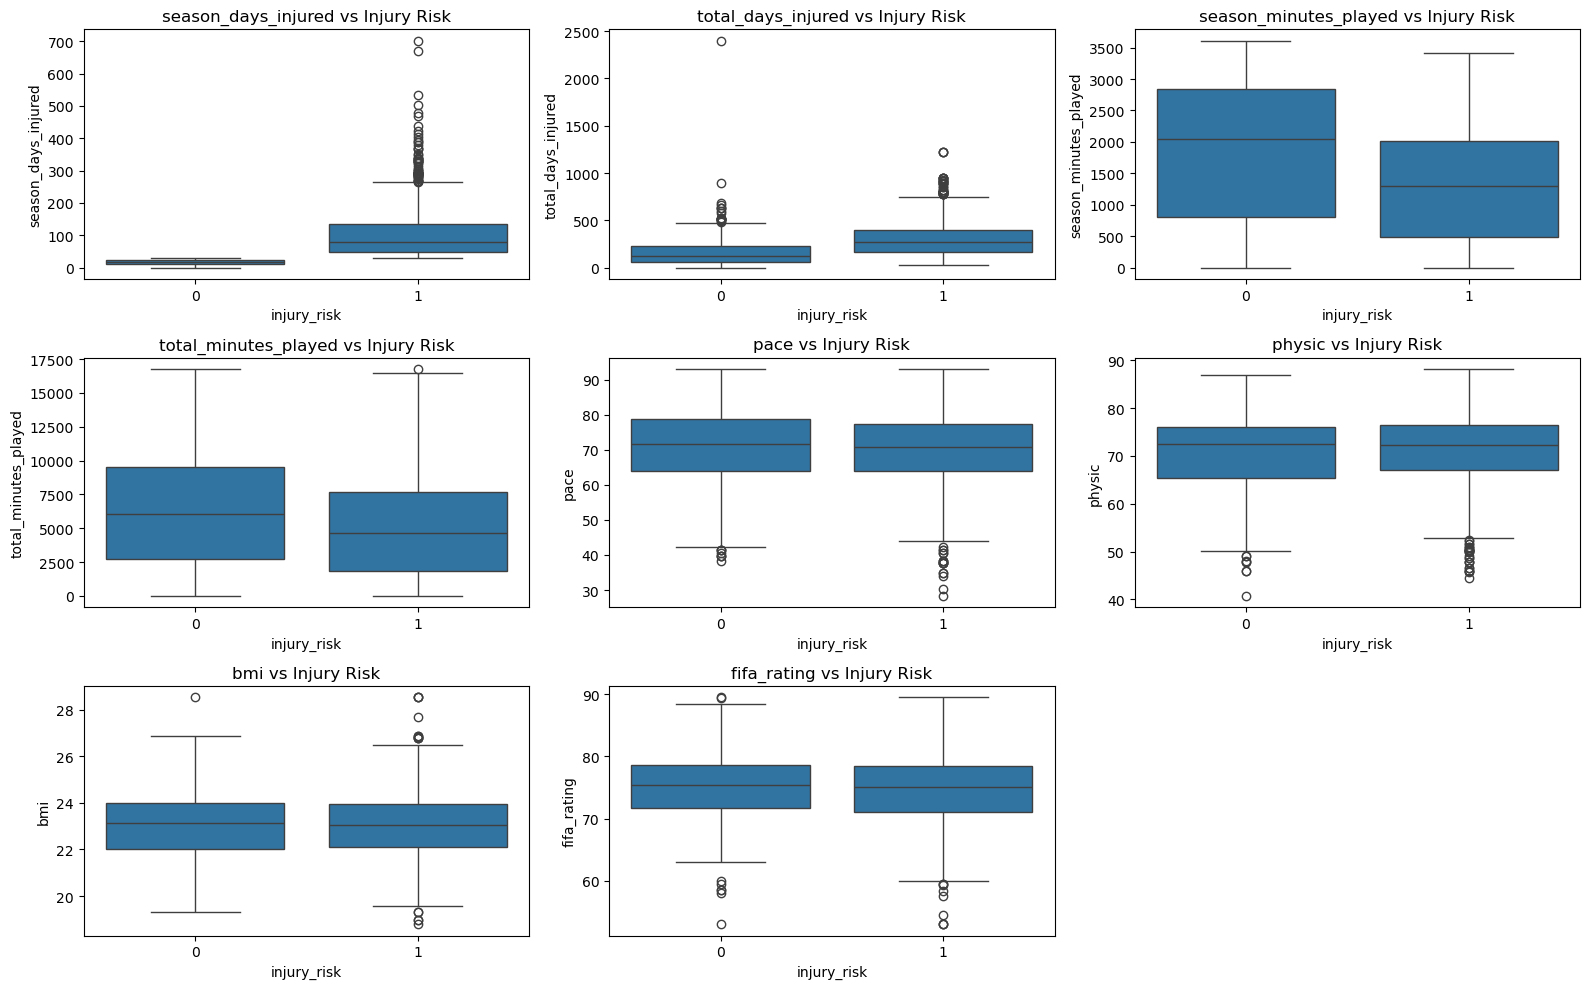

In [20]:
# Compare numeric features by injury risk
plt.figure(figsize=(16,10))
for i, col in enumerate(num_cols):
    plt.subplot(3,3,i+1)
    sns.boxplot(x='injury_risk', y=col, data=data)
    plt.title(f'{col} vs Injury Risk')
plt.tight_layout()
plt.show()


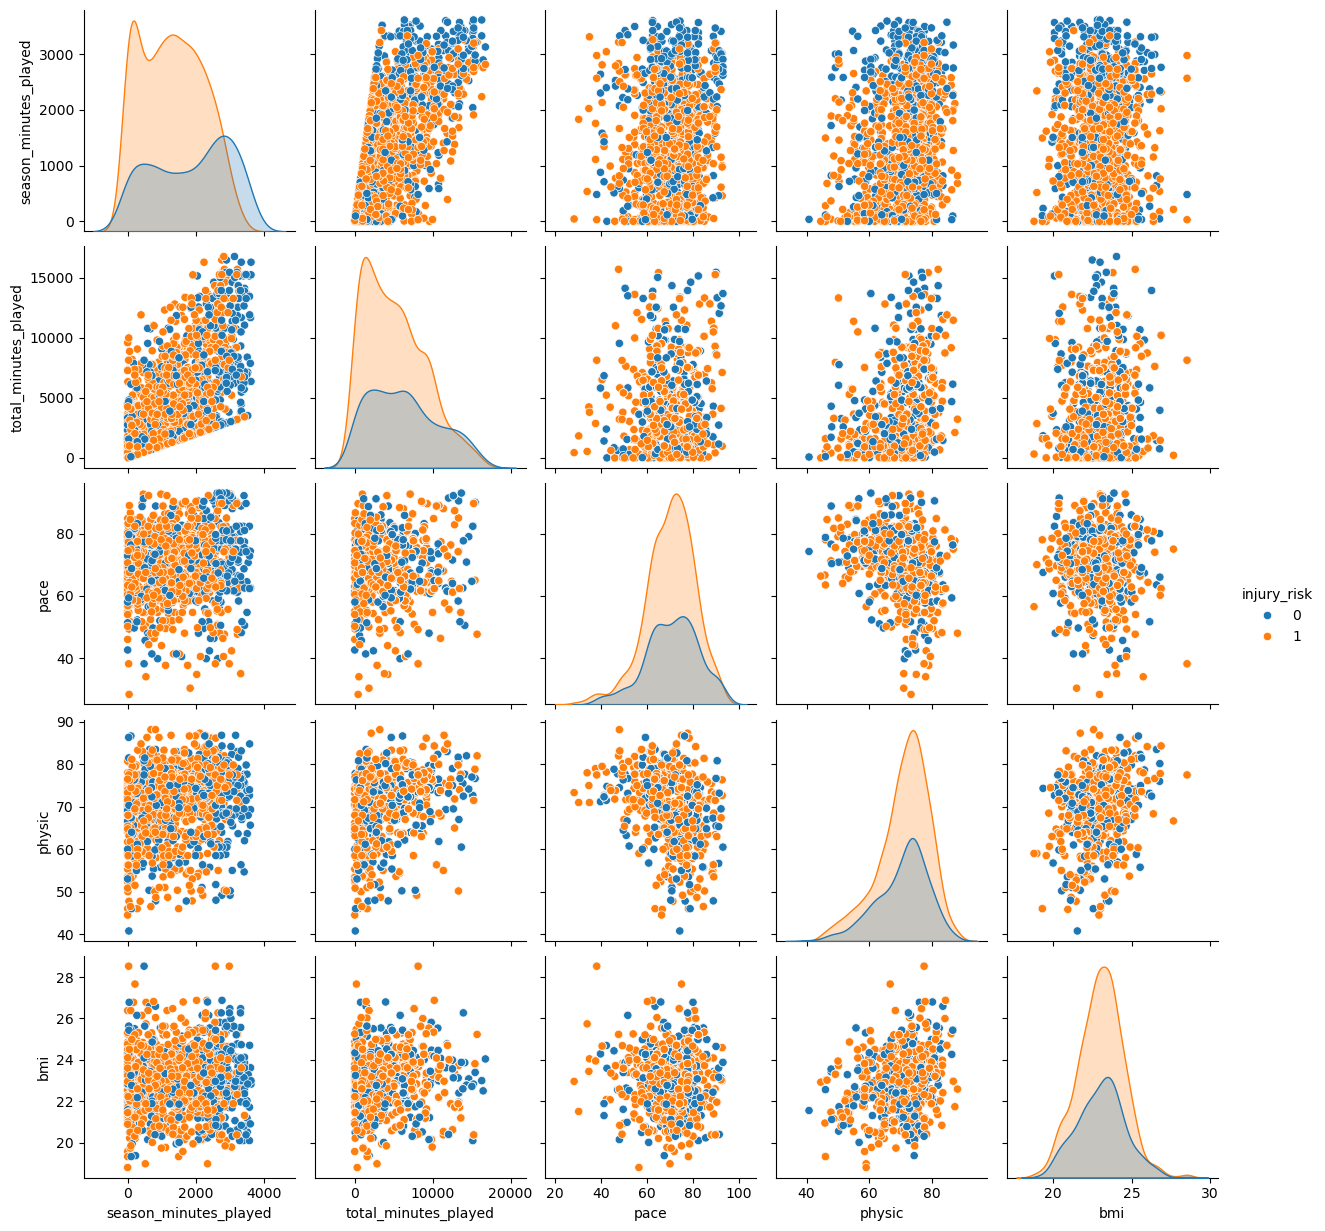

In [21]:
# Pairplot for selected numeric features
selected_cols = ['season_minutes_played', 'total_minutes_played', 'pace', 'physic', 'bmi', 'injury_risk']
sns.pairplot(data[selected_cols], hue='injury_risk')
plt.show()


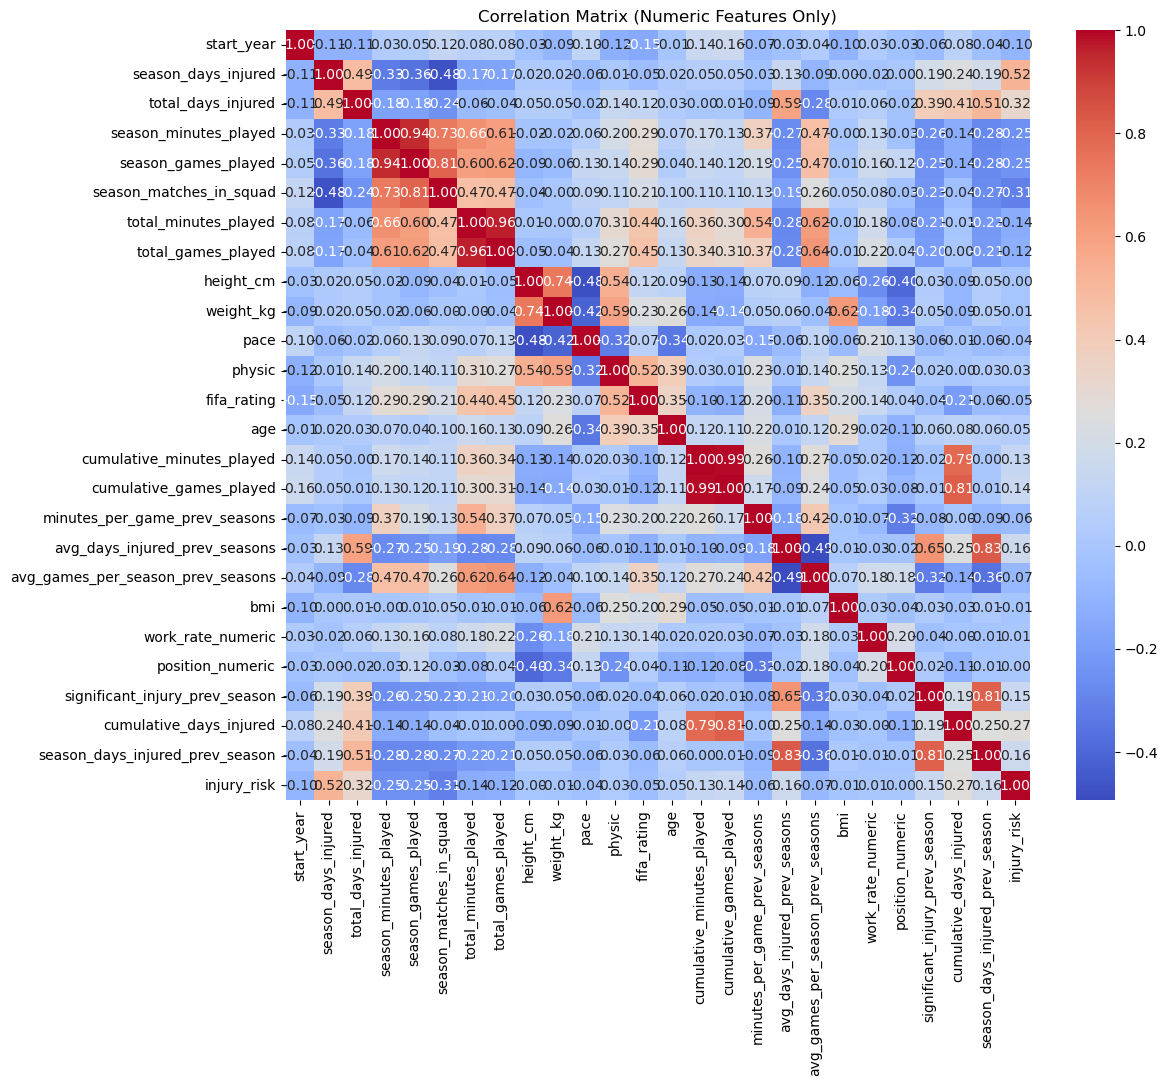

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Compute correlation
corr = numeric_data.corr()

# Plot correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix (Numeric Features Only)")
plt.show()


In [23]:
# Compute correlation with injury_risk
corr_target = numeric_data.corr()['season_days_injured']  # using original season_days_injured first

# If you already created injury_risk column
# corr_target = numeric_data.join(data['injury_risk']).corr()['injury_risk']

# Sort correlations
corr_target = corr_target.sort_values(ascending=False)
print(corr_target)


season_days_injured                  1.000000
injury_risk                          0.521908
total_days_injured                   0.486199
cumulative_days_injured              0.240429
significant_injury_prev_season       0.189084
season_days_injured_prev_season      0.188183
avg_days_injured_prev_seasons        0.131220
cumulative_games_played              0.053567
cumulative_minutes_played            0.050787
age                                  0.022169
height_cm                            0.021040
weight_kg                            0.019699
physic                               0.009574
bmi                                  0.004757
position_numeric                     0.003328
work_rate_numeric                   -0.018107
minutes_per_game_prev_seasons       -0.027670
fifa_rating                         -0.054316
pace                                -0.059692
avg_games_per_season_prev_seasons   -0.089847
start_year                          -0.111305
total_games_played                



# **Football Injury Prediction Project – Full Summary**

---

## **1. Problem Statement**

* Goal: **Predict injury risk of football players** based on match load, training, fitness, and previous injuries.
* Target: Binary classification → `injury_risk` (1 = high risk, 0 = low risk)
* Use **boosting algorithms**: XGBoost, Gradient Boosting, AdaBoost for high accuracy.

---

## **2. Dataset Overview**

* **Dataset shape**: 1301 rows × 30 columns
* **Key columns**:

  * Player info: `p_id2`, `dob`, `nationality`, `position`
  * Match stats: `season_minutes_played`, `season_games_played`, `total_minutes_played`, etc.
  * Fitness & injury: `pace`, `physic`, `bmi`, `avg_days_injured_prev_seasons`, `season_days_injured_prev_season`, `cumulative_days_injured`
* **Data types**:

  * Numeric → int64, float64
  * Categorical → object (strings)

---

## **3. Exploratory Data Analysis (EDA)**

### **Missing Values**

* Columns like `pace`, `physic`, `cumulative_minutes_played`, `minutes_per_game_prev_seasons` have missing values.
* **Solution:** Impute numeric columns with **median**, categorical with **mode**.

### **Statistical Summary**

* Use `data.describe()` to check mean, min, max, std deviation.
* Helps detect **outliers** (e.g., extremely high `total_days_injured`).

### **Distribution of Features**

* Numeric features mostly normally distributed (`pace`, `physic`)
* `season_days_injured` skewed → many players have few injury days, few have high injury days

### **Categorical Analysis**

* `position`: Goalkeeper, Defender, Midfielder, Forward
* `work_rate`: Low/Medium/High or combinations
* `nationality`: many countries → optional for modeling

### **Correlation Analysis**

* Correlation computed only on numeric columns
* Strong positive correlation with injury risk:

  * `season_days_injured_prev_season`
  * `cumulative_days_injured`
  * `avg_days_injured_prev_seasons`
  * `season_minutes_played`
* Weak or negative correlation: `pace`, `physic` → higher fitness may reduce injury risk

### **Target Analysis**

* `injury_risk` defined as `season_days_injured > 30` → binary classification
* Dataset slightly imbalanced → need **stratified train-test split** or class weighting in boosting algorithms

---

## **4. Preprocessing Steps**

1. **Handle missing values**:

   * Median for numeric
   * Mode for categorical
2. **Drop non-essential string columns**: `p_id2`, `dob`, `nationality`, `work_rate`, `position`
3. **Encode categorical numeric columns**: `position_numeric`, `work_rate_numeric`
4. **Create target variable**: `injury_risk` (1 = high risk, 0 = low risk)
5. **Feature selection**:

   * Keep numeric columns highly correlated with target
   * Drop redundant columns (`season_days_injured`, `total_days_injured`)

---

## **5. Feature Engineering Ideas**

* Rolling averages: `minutes_per_game_prev_seasons`, `avg_days_injured_prev_seasons`
* Interaction features: `age × season_minutes_played`, `cumulative_days_injured × season_minutes_played`
* Fatigue index = `season_minutes_played + cumulative_minutes_played`

---

## **6. Modeling Approach**

* **Train-test split**: 80-20 or 70-30
* **Algorithms**:

  * **XGBoost** → handles nonlinear relations, missing values
  * **Gradient Boosting** → robust tree-based method
  * **AdaBoost** → simple boosting for tabular data
* **Evaluation metrics**:

  * Accuracy
  * F1-score (important for imbalanced classes)
  * ROC-AUC
  * Confusion matrix

---

## **7. Feature Importance**

* Boosting algorithms can show **which features contribute most** to injury risk:

  * Likely top features: `cumulative_days_injured`, `season_days_injured_prev_season`, `avg_days_injured_prev_seasons`, `season_minutes_played`
* Helps **explain model decisions to coaches or clubs**

---

## **8. Insights from EDA**

* Most injuries are from **overload/fatigue**, not low fitness
* Previous injury history is a **strong predictor**
* High `season_minutes_played` → higher risk → load management can help prevent injuries
* Fitness metrics like `pace` or `physic` are protective factors

---

## ✅ **Next Steps**

1. Apply **preprocessing and feature engineering**
2. Train **XGBoost, Gradient Boosting, AdaBoost**
3. Evaluate models using **accuracy, F1, ROC curves**
4. Visualize **feature importance**
5. Optionally deploy a **web app for injury risk prediction**




In [28]:
import warnings
warnings.filterwarnings("ignore")

In [29]:
import pandas as pd



# Fill missing numeric columns with median
numeric_cols = ['pace', 'physic', 'cumulative_minutes_played', 'cumulative_games_played',
                'minutes_per_game_prev_seasons', 'avg_days_injured_prev_seasons',
                'avg_games_per_season_prev_seasons', 'significant_injury_prev_season',
                'cumulative_days_injured', 'season_days_injured_prev_season']

for col in numeric_cols:
    data[col].fillna(data[col].median(), inplace=True)

# Fill missing numeric categorical columns with mode
data['position_numeric'].fillna(data['position_numeric'].mode()[0], inplace=True)


In [30]:
data.isnull().sum()

p_id2                                0
start_year                           0
season_days_injured                  0
total_days_injured                   0
season_minutes_played                0
season_games_played                  0
season_matches_in_squad              0
total_minutes_played                 0
total_games_played                   0
dob                                  0
height_cm                            0
weight_kg                            0
nationality                          0
work_rate                            0
pace                                 0
physic                               0
fifa_rating                          0
position                             2
age                                  0
cumulative_minutes_played            0
cumulative_games_played              0
minutes_per_game_prev_seasons        0
avg_days_injured_prev_seasons        0
avg_games_per_season_prev_seasons    0
bmi                                  0
work_rate_numeric        

In [31]:
# Drop columns not needed for modeling
data.drop(['p_id2', 'dob', 'nationality', 'work_rate', 'position'], axis=1, inplace=True)


In [32]:
# Define injury risk: 1 = season_days_injured > 30, else 0
data['injury_risk'] = data['season_days_injured'].apply(lambda x: 1 if x > 30 else 0)


In [33]:
# Drop target-related columns from features
X = data.drop(['season_days_injured', 'total_days_injured', 'injury_risk'], axis=1)
y = data['injury_risk']


In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [36]:
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [37]:
# XGBoost
xgb_model = XGBClassifier(n_estimators=200, max_depth=4, learning_rate=0.1, random_state=42)

# Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=200, max_depth=4, learning_rate=0.1, random_state=42)

# AdaBoost
ada_model = AdaBoostClassifier(n_estimators=200, learning_rate=0.1, random_state=42)


In [38]:
# Train XGBoost
xgb_model.fit(X_train, y_train)

# Train Gradient Boosting
gb_model.fit(X_train, y_train)

# Train AdaBoost
ada_model.fit(X_train, y_train)


AdaBoostClassifier(learning_rate=0.1, n_estimators=200, random_state=42)

In [39]:
# XGBoost predictions
y_pred_xgb = xgb_model.predict(X_test)

# Gradient Boosting predictions
y_pred_gb = gb_model.predict(X_test)

# AdaBoost predictions
y_pred_ada = ada_model.predict(X_test)


In [40]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"--- {model_name} ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("ROC-AUC:", roc_auc_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("\n")

# Evaluate all
evaluate_model(y_test, y_pred_xgb, "XGBoost")
evaluate_model(y_test, y_pred_gb, "Gradient Boosting")
evaluate_model(y_test, y_pred_ada, "AdaBoost")


--- XGBoost ---
Accuracy: 0.7969348659003831
F1 Score: 0.8547945205479452
ROC-AUC: 0.7480398671096344
Confusion Matrix:
 [[ 52  34]
 [ 19 156]]


--- Gradient Boosting ---
Accuracy: 0.7969348659003831
F1 Score: 0.853185595567867
ROC-AUC: 0.7539534883720931
Confusion Matrix:
 [[ 54  32]
 [ 21 154]]


--- AdaBoost ---
Accuracy: 0.8045977011494253
F1 Score: 0.8675324675324675
ROC-AUC: 0.7271428571428571
Confusion Matrix:
 [[ 43  43]
 [  8 167]]




In [41]:
import joblib

# Save the trained XGBoost model
joblib.dump(xgb_model, "football_injury_model.pkl")
print("Trained XGBoost model saved as football_injury_model.pkl")


Trained XGBoost model saved as football_injury_model.pkl


In [42]:
# Save the StandardScaler
joblib.dump(scaler, "scaler.pkl")
print("Scaler saved as scaler.pkl")


Scaler saved as scaler.pkl
